<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Upsample" data-toc-modified-id="Upsample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsample</a></span></li><li><span><a href="#Downsample" data-toc-modified-id="Downsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsample</a></span></li><li><span><a href="#Автоматическая-балансировка-классов" data-toc-modified-id="Автоматическая-балансировка-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Автоматическая балансировка классов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve

pd.set_option('display.max_columns', None)
seed = 42

In [2]:
# Датасет загружен с Kaggle по ссылке 
# https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling/download?datasetVersionNumber=1
# data = pd.read_csv('Churn_Modelling.csv', sep=',')
# Но оказалось, что это другой датасет. Используем тот, что в задании на предыдущей странице

data = pd.read_csv('/datasets/Churn.csv', sep=',')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски значений `Tenure` не подходят для обучения. Удаляем эти строки, приводим тип данных к целочисленному.

In [4]:
data = data.dropna(subset=['Tenure']).reset_index(drop=True)
data['Tenure'] = data['Tenure'].astype('int')

In [5]:
data.duplicated().sum()

0

В данных нет повторяющихся строк.

Создадим спимок `num_row`, в котором хранятся названия столбцов с числовыми признаками. Посмотрим свойства.

In [6]:
num_row = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[num_row].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,100181.214924
std,96.410471,10.555581,2.894723,62329.528576,0.581003,57624.755647
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,51227.745000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,100240.200000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,149567.210000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


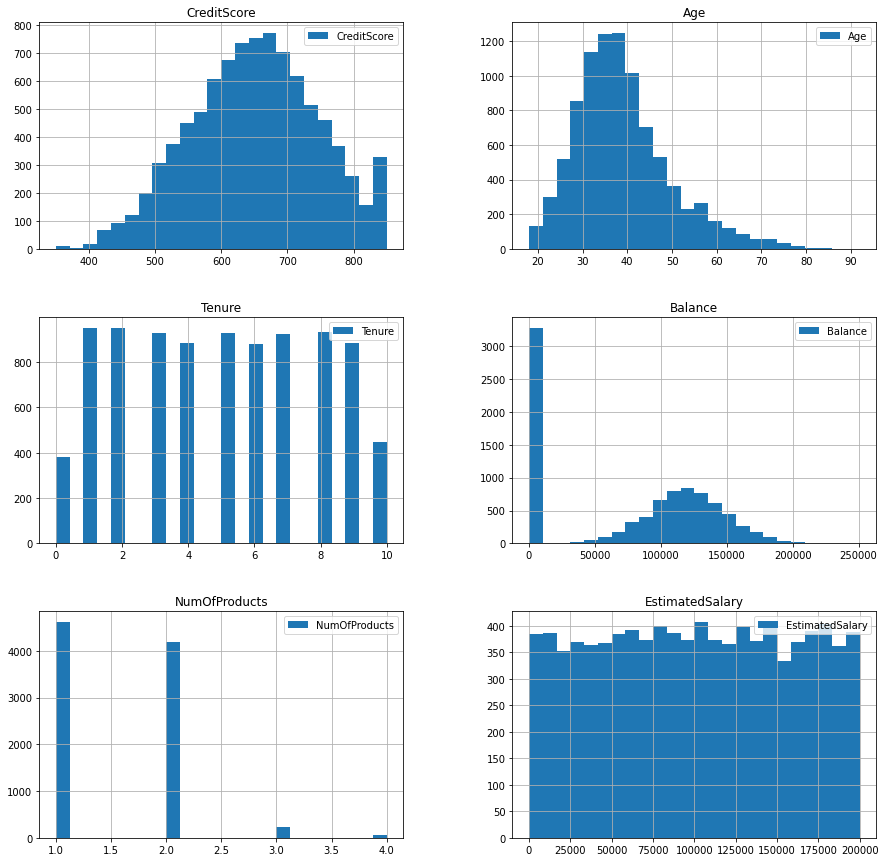

In [7]:
data[num_row].hist(
    bins=24,
    figsize=(15, 15), 
    grid=True, 
    legend=True
)
plt.show()

В `CreditScore`, `Age` и `Balance` имеем распределения, близкие к нормальному. При этом в `Balance` отдельно выделяется категория с нулевой суммой на счету.

Создадим спимок `cat_row`, в котором хранятся названия столбцов с категориальными признаками. Эти признаки потребуют кодирования.

In [8]:
cat_row = ['Geography', 'Gender']

"Geography: ['France' 'Spain' 'Germany']"

"Gender: ['Female' 'Male']"

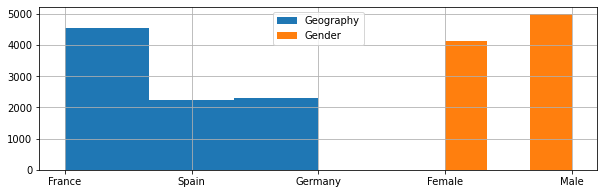

In [9]:
for row in cat_row:
    display(f'{row}: {data[row].unique()}')
    data[row].hist(
    bins=3,
    figsize=(10, 3), 
    grid=True, 
    legend=True)

plt.show()

Создадим спимок `bool_row`, в котором хранятся названия столбцов с булевыми признаками. Посмотрим распределения.

'HasCrCard: [1 0]'

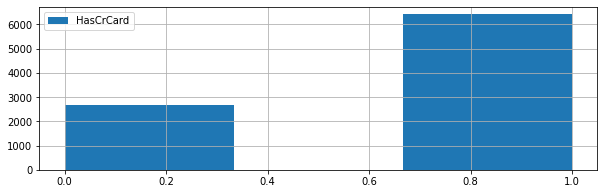

'IsActiveMember: [1 0]'

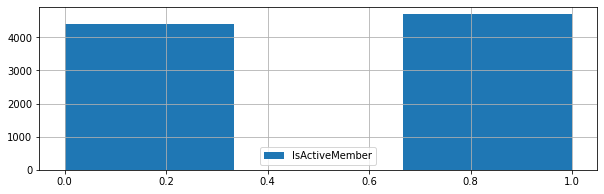

'Exited: [1 0]'

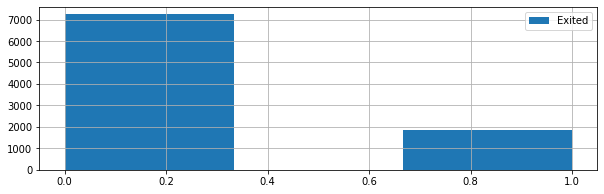

In [10]:
bool_row = ['HasCrCard', 'IsActiveMember', 'Exited']

for row in bool_row:
    display(f'{row}: {data[row].unique()}')
    data[row].hist(
    bins=3,
    figsize=(10, 3), 
    grid=True, 
    legend=True)
    plt.show()

In [11]:
data['Exited'].mean()

0.2039379606203938

Среднее значение целевого признака - 0.2. Можно сделать вывод о дисбалансе классов.

### Вывод

Проанализированы и подготовлены к дальнейшей работе данные из таблицы клиентов '/datasets/Churn.csv'.

В таблице содержатся следующие признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

- В данных отсутствуют дубликаты строк. 
- Удалены строки с пропусками значений в столбце `Tenure`.
- Значения в столбцах `CreditScore`, `Age` и `Balance` имеют распределения, близкие к нормальному. При этом в `Balance` отдельно выделяется категория с нулевой суммой на счету.
- Среднее значение целевого признака - 0.2. То есть 20% клиентов покинули банк. Можно сделать вывод о дисбалансе классов.

## Исследование задачи

Для анализа нам не понадобятся идентификационные данные клиентов. Они уникальны и не должны влиять на целевой признак. Удалим столбцы `RowNumber`, `CustomerId`, `Surname`.

In [12]:
data['NotZeroBalance'] = 1
data.loc[data['Balance']==0, 'NotZeroBalance'] = data.loc[data['Balance']==0, 'Balance']
data['NotZeroBalance'] = data['NotZeroBalance'].astype('int')

In [13]:
data_set = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Произведем прямое кодирование признаков с удалением первого столбца.

In [14]:
data_set_ohe = pd.get_dummies(data_set, drop_first=True)

In [15]:
data_set_ohe.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NotZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
2761,680,33,1,123082.08,1,1,0,134960.98,0,1,0,0,1
7989,797,45,8,0.00,1,0,0,125110.02,0,0,0,0,1
9070,683,32,9,0.00,2,1,1,24991.92,0,0,0,0,0


Произведем стандартизацию.

In [16]:
#scaler = StandardScaler()
#scaler.fit(data_set_ohe[num_row])
#data_set_ohe_scaler = data_set_ohe
#data_set_ohe_scaler[num_row] = scaler.transform(data_set_ohe_scaler[num_row])

In [17]:
target = data_set_ohe['Exited']
features = data_set_ohe.drop(['Exited'] , axis=1)

Разделим данные на обучающую, валидационную и тестовую выборки.

In [18]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    test_size=0.4, 
    random_state=seed#,
    #stratify=features['NotZeroBalance']
) 

In [19]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, 
    target_valid, 
    test_size=0.5, 
    random_state=seed#,
    #stratify=features_valid['NotZeroBalance']
) 

In [20]:
#features_valid = features_valid.drop('NotZeroBalance', axis=1)
#features_test = features_test.drop('NotZeroBalance', axis=1)
#features_train = features_train.drop('NotZeroBalance', axis=1)

In [21]:
display(f'Размер обучающей выборки: {features_train.shape[0]}')
display(f'Размер валидационной выборки: {features_valid.shape[0]}')
display(f'Размер тестовой выборки: {features_test.shape[0]}')

'Размер обучающей выборки: 5454'

'Размер валидационной выборки: 1818'

'Размер тестовой выборки: 1819'

In [22]:
features_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,NotZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
6419,679,40,1,0.00,1,1,1,16897.19,0,0,0,1
8454,722,37,0,125977.81,1,0,0,160162.42,1,1,0,0
3235,670,68,4,0.00,2,1,1,11426.70,0,0,0,1


<div class="alert alert-info"> <b>Комментарий студента:</b>
<br> Ниже провожу масштабирование, уже на основе обучающей выборки.</div>

In [23]:
# чтобы не было предупреждения
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[num_row])
features_train[num_row] = scaler.transform(features_train[num_row])

In [24]:
features_valid.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,NotZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
8689,724,29,4,0.0,1,1,0,8982.75,0,0,0,1
8466,635,41,10,0.0,2,1,1,61994.20,0,0,1,0
1554,630,42,6,0.0,2,1,0,162697.93,0,0,0,1


In [25]:
features_valid[num_row] = scaler.transform(features_valid[num_row])
features_test[num_row] = scaler.transform(features_test[num_row])

In [26]:
features_valid.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,NotZeroBalance,Geography_Germany,Geography_Spain,Gender_Male
8689,0.779845,-0.945619,-0.366150,-1.224819,-0.911479,1,0,-1.585121,0,0,0,1
8466,-0.143546,0.195989,1.702189,-1.224819,0.804506,1,1,-0.662100,0,0,1,0
1554,-0.195422,0.291123,0.323296,-1.224819,0.804506,1,0,1.091328,0,0,0,1


In [27]:
target_valid.value_counts()

0    1437
1     381
Name: Exited, dtype: int64

In [28]:
target_test.value_counts()

0    1457
1     362
Name: Exited, dtype: int64

In [29]:
target_train.value_counts()

0    4343
1    1111
Name: Exited, dtype: int64

Функция для отрисовки ROC-curve.

In [30]:
def plot_roc(mod, feat, targ): # на вход передается модель и признаки
    probabilities_valid = mod.predict_proba(feat)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    fpr, tpr, thresholds = roc_curve(targ, probabilities_one_valid) 
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    ras = roc_auc_score(targ, probabilities_one_valid)
    display(f'Значение метрики AUC-ROC: {ras}')
    predictions = mod.predict(feat)
    display(f'Accuracy: {accuracy_score(targ, predictions)}')
    display(f'F1: {f1_score(targ, predictions)}')
    display(f'Precision: {precision_score(targ, predictions)}')
    display(f'Recall: {recall_score(targ, predictions)}')

### Логистическая регрессия 

Оценим на быстрой модели логистической регрессии с небольшим набором гиперпараметров значения метрики F1. 

In [31]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag']
class_weight = ['balanced', None]

In [32]:
for cw in class_weight:
    for sol in solver:
        model_lr = LogisticRegression(random_state=seed, solver=sol, class_weight=cw, max_iter=10000)
        model_lr.fit(features_train, target_train)
        predictions = model_lr.predict(features_valid)
        result = f1_score(target_valid, predictions)
        display(f'{result}: solver = {sol}, class_weight = {cw}, max_iter = 10000')

'0.5042333019755408: solver = lbfgs, class_weight = balanced, max_iter = 10000'

'0.5042333019755408: solver = liblinear, class_weight = balanced, max_iter = 10000'

'0.5042333019755408: solver = newton-cg, class_weight = balanced, max_iter = 10000'

'0.5042333019755408: solver = sag, class_weight = balanced, max_iter = 10000'

'0.2988505747126437: solver = lbfgs, class_weight = None, max_iter = 10000'

'0.2988505747126437: solver = liblinear, class_weight = None, max_iter = 10000'

'0.2988505747126437: solver = newton-cg, class_weight = None, max_iter = 10000'

'0.2988505747126437: solver = sag, class_weight = None, max_iter = 10000'

На графике ROC-кривой пример неудачной модели, полученной без учета дисбаланса классов. Так выглядит неуспех.

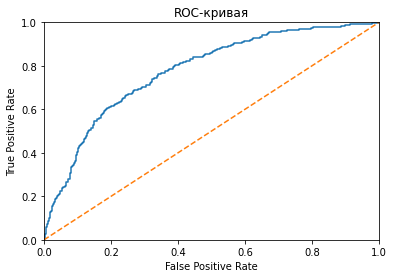

'Значение метрики AUC-ROC: 0.7760407819586226'

'Accuracy: 0.7986798679867987'

'F1: 0.2988505747126437'

'Precision: 0.5531914893617021'

'Recall: 0.2047244094488189'

In [33]:
plot_roc(model_lr, features_valid, target_valid)

### Дерево решений

Исследуем следующие гиперпараметры для модели:

In [34]:
criterion = ['gini', 'entropy']
min_samples_split = [2, 4, 10]
class_weight = [None]

In [35]:
%%time

best_model_dtc = None
best_result_dtc = 0
best_params = ''

for depth in range(1, 60):
    for cri in criterion:
        for mss in min_samples_split:
            for cw in class_weight:
                model_dtc = DecisionTreeClassifier(
                    random_state=seed, criterion=cri, max_depth=depth, class_weight=cw, min_samples_split=mss
                )
                model_dtc.fit(features_train, target_train)
                predictions = model_dtc.predict(features_valid)
                result = f1_score(target_valid, predictions)
                if result > best_result_dtc:
                    best_model_dtc = model_dtc 
                    best_result_dtc = result 
                    best_params = f'max_depth = {depth}, criterion = {cri}, class_weight = {cw}, min_samples_split = {mss}'        

CPU times: user 9.07 s, sys: 0 ns, total: 9.07 s
Wall time: 9.08 s


In [36]:
best_params

'max_depth = 8, criterion = entropy, class_weight = None, min_samples_split = 10'

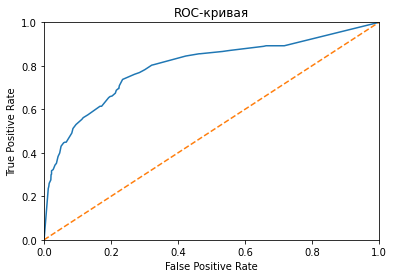

'Значение метрики AUC-ROC: 0.7963057331820996'

'Accuracy: 0.8377337733773378'

'F1: 0.5354330708661419'

'Precision: 0.6692913385826772'

'Recall: 0.4461942257217848'

In [37]:
plot_roc(best_model_dtc, features_valid, target_valid)

Мы получили близкое к целевому значение F1-меры.

### Случайный лес

Для исследования случайного леса напишем вручную функцию для тестирования. 
На вход подаются обучающая и валидационная выборка, наборы гиперпараметров.
Функция возвращает датафрейм с результатами и обученную модель с наилучшим результатом F1.

In [38]:
def rfc_tester(
    features_train, 
    target_train,
    features_valid,
    target_valid,
    max_features, 
    max_leaf_nodes, 
    min_samples_leaf, 
    min_samples_split, 
    class_weight,
    n_estimators=(1,2,1)):
    
    # здесь будут храниться параметры и полученная метрика f1
    df_rfc = pd.DataFrame(
        {
            'max_features': [],
            'max_leaf_nodes': [],
            'min_samples_leaf': [],
            'min_samples_split': [],
            'n_estimators': [],
            'class_weight': [],
            'result': []
        }
    )
    
    best_model_rfc = None
    best_result_rfc = 0
    (i, j, k) = n_estimators
    
    for est in range(i, j, k):
        for mf in max_features:
            for mln in max_leaf_nodes:
                for misl in min_samples_leaf:
                    for miss in min_samples_split:
                        for cw in class_weight:
                            model_rfc = RandomForestClassifier(
                                random_state=seed,
                                max_features=mf,
                                max_leaf_nodes=mln,
                                min_samples_leaf=misl,
                                min_samples_split=miss,
                                n_estimators=est, 
                                criterion ='gini', 
                                class_weight=cw
                            ) 
                            model_rfc.fit(features_train, target_train)
                            predictions = model_rfc.predict(features_valid)
                            result = f1_score(target_valid, predictions)
                            df_rfc.loc[len(df_rfc.index)] = [mf, mln, misl, miss, est, cw, result]
                            if result > best_result_rfc:
                                best_model_rfc = model_rfc
                                best_result_rfc = result
    
    return best_model_rfc, df_rfc

In [39]:
# набор гиперпараметров для пробы
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [2, 10, 12]
min_samples_leaf = [2, 10, 16]
min_samples_split = [2, 10, 16]
class_weight = [None]
n_estimators = (5, 50, 5) # начальное, конечное, шаг
# время выполнения на сервере Яндекса с такими параметрами - около 1,5 мин

In [40]:
%%time
(best_model_rfc, df_rfc) = rfc_tester(
    features_train, 
    target_train,
    features_valid,
    target_valid,
    max_features, 
    max_leaf_nodes, 
    min_samples_leaf, 
    min_samples_split, 
    class_weight, 
    n_estimators
)

CPU times: user 1min 16s, sys: 261 ms, total: 1min 16s
Wall time: 1min 16s


In [41]:
df_rfc.sort_values(by='result').tail(5)

,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,n_estimators,class_weight,result
477,NaN,12.0,2.0,2.0,30.0,NaN,0.484956
644,NaN,12.0,10.0,16.0,40.0,NaN,0.484956
643,NaN,12.0,10.0,10.0,40.0,NaN,0.484956
75,NaN,12.0,10.0,2.0,5.0,NaN,0.484956
72,NaN,12.0,2.0,2.0,5.0,NaN,0.484956


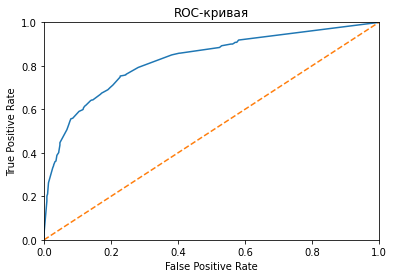

'Значение метрики AUC-ROC: 0.826743342885897'

'Accuracy: 0.8399339933993399'

'F1: 0.4849557522123893'

'Precision: 0.7445652173913043'

'Recall: 0.35958005249343833'

In [42]:
plot_roc(best_model_rfc, features_valid, target_valid)

### Вывод

- Для построения моделей не использовались идентификационные значения столбцов `RowNumber`, `CustomerId`, `Surname`.
- Произведно прямое кодирование признаков с удалением первого столбца.
- Произведена стандартизация.
- Данные разделены на обучающую, валидационную и тестовую выборки.

Для построения моделей использовался произвольный набор гиперпараметров. Целью являлось продемонстрировать их влияния на метрики и приблизиться к целевому значению F1.

- Построена модель логистической регрессии, на которой удалось получить значения F1-меры 0.299 без учета дисбаланса классов.
- Построена модель дерева решений, на которой удалось получить значения F1-меры 0.535 без учета дисбаланса классов.
- Построена модель случайного леса, на которой удалось получить значения F1-меры 0.485 без учета дисбаланса классов.
- Для полученных моделей построены графики ROC-curve и вычислены значения метрик AUC-ROC, Accuracy, Precision, Recall

## Борьба с дисбалансом

Дисбаланс классов на графике.

<AxesSubplot:>

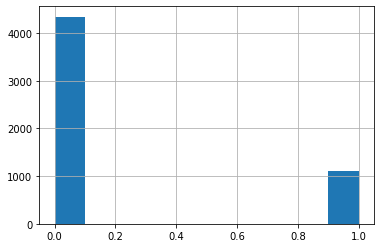

In [43]:
target_train.hist()

### Upsample

In [44]:
# функция для увеличения значимой выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_ups = pd.concat([features_zeros] + [features_ones] * repeat)
    target_ups = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_ups, target_ups = shuffle(features_ups, target_ups, random_state=42)
    
    return features_ups, target_ups

In [45]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<AxesSubplot:>

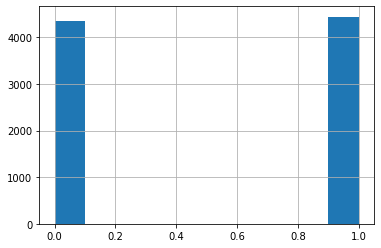

In [46]:
target_upsampled.hist()

In [47]:
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [2, 10, 12]
min_samples_leaf = [2, 10, 16]
min_samples_split = [2, 10, 16]
#class_weight = ['balanced', None]
class_weight = [None]
n_estimators = (5, 50, 5)

# время выполнения на сервере Яндекса с такими параметрами - около 4 мин

In [48]:
%%time
(best_model_rfc, df_rfc) = rfc_tester(
    features_upsampled, 
    target_upsampled,
    features_valid,
    target_valid,
    max_features, 
    max_leaf_nodes, 
    min_samples_leaf, 
    min_samples_split, 
    class_weight, 
    n_estimators
)

CPU times: user 1min 46s, sys: 337 ms, total: 1min 46s
Wall time: 1min 46s


In [49]:
df_rfc.sort_values(by='result').tail(5)

,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,n_estimators,class_weight,result
117,log2,10.0,2.0,2.0,10.0,None,0.598351
279,log2,10.0,2.0,2.0,20.0,None,0.601537
252,sqrt,10.0,2.0,2.0,20.0,None,0.601537
280,log2,10.0,2.0,10.0,20.0,None,0.601537
253,sqrt,10.0,2.0,10.0,20.0,None,0.601537


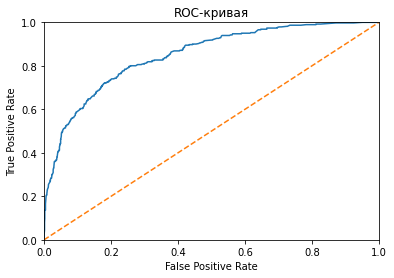

'Значение метрики AUC-ROC: 0.8488320483947855'

'Accuracy: 0.8003300330033003'

'F1: 0.601536772777168'

'Precision: 0.5169811320754717'

'Recall: 0.7191601049868767'

In [50]:
plot_roc(best_model_rfc, features_valid, target_valid)

F1-мера улучшилась и достигла целевого показателя.

### Downsample

In [51]:
# функция для уменьшения нулевой выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = features_zeros.sample(frac=fraction, random_state=seed)
    target_downsampled = target_zeros.sample(frac=fraction, random_state=seed)

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=seed)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=seed)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=seed)    
    
    return features_downsampled, target_downsampled

In [52]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

<AxesSubplot:>

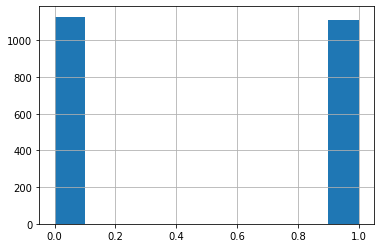

In [53]:
target_downsampled.hist()

In [54]:
max_features = ['sqrt', 'log2', None]
max_leaf_nodes = [2, 10, 12]
min_samples_leaf = [2, 10, 16]
min_samples_split = [2, 10, 16]
#class_weight = ['balanced', None]
class_weight = [None]
n_estimators = (5, 50, 5)

# время выполнения на сервере Яндекса с такими параметрами - около 2 мин

In [55]:
%%time
(best_model_rfc, df_rfc) = rfc_tester(
    features_downsampled, 
    target_downsampled,
    features_valid,
    target_valid,
    max_features, 
    max_leaf_nodes, 
    min_samples_leaf, 
    min_samples_split, 
    class_weight, 
    n_estimators
)

CPU times: user 49.9 s, sys: 163 ms, total: 50.1 s
Wall time: 50.3 s


In [56]:
df_rfc.sort_values(by='result').tail(5)

,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,n_estimators,class_weight,result
122,log2,10.0,10.0,16.0,10.0,None,0.600907
95,sqrt,10.0,10.0,16.0,10.0,None,0.600907
121,log2,10.0,10.0,10.0,10.0,None,0.600907
263,sqrt,12.0,2.0,16.0,20.0,None,0.603352
290,log2,12.0,2.0,16.0,20.0,None,0.603352


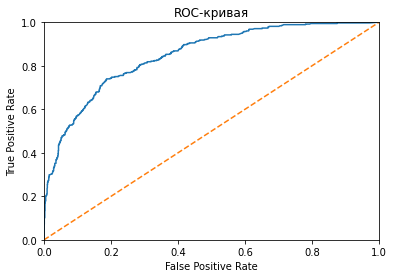

'Значение метрики AUC-ROC: 0.8492366168216448'

'Accuracy: 0.8047304730473047'

'F1: 0.6033519553072626'

'Precision: 0.5252918287937743'

'Recall: 0.7086614173228346'

In [57]:
plot_roc(best_model_rfc, features_valid, target_valid)

F1-мера также не опустилась ниже целевого показателя.

### Автоматическая балансировка классов

Применим параметр class_weight со значением 'balanced'.

In [63]:
#max_features = ['sqrt', 'log2', None]
max_features = [None]
#max_leaf_nodes = [2, 10, 12]
max_leaf_nodes = [12, 16, 26]
#min_samples_leaf = [2, 10, 16]
min_samples_leaf = [2, 5]
#min_samples_split = [2, 10, 16]
min_samples_split = [16, 30]
class_weight = ['balanced']
n_estimators = (20, 100, 10) 

# время выполнения на сервере Яндекса с такими параметрами - около 1,5 мин

In [64]:
%%time
(best_model_rfc, df_rfc) = rfc_tester(
    features_train, 
    target_train,
    features_valid,
    target_valid,
    max_features, 
    max_leaf_nodes, 
    min_samples_leaf, 
    min_samples_split, 
    class_weight, 
    n_estimators
)

CPU times: user 45.4 s, sys: 152 ms, total: 45.5 s
Wall time: 45.7 s


In [65]:
df_rfc.sort_values(by='result').tail(5)

,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,n_estimators,class_weight,result
43,None,16.0,5.0,30.0,50.0,balanced,0.613861
37,None,12.0,2.0,30.0,50.0,balanced,0.615558
39,None,12.0,5.0,30.0,50.0,balanced,0.615558
36,None,12.0,2.0,16.0,50.0,balanced,0.615558
38,None,12.0,5.0,16.0,50.0,balanced,0.615558


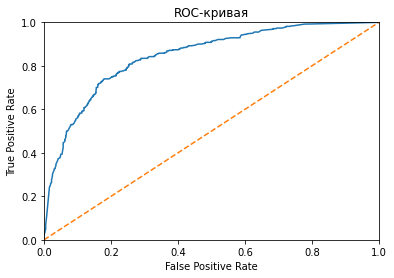

'Значение метрики AUC-ROC: 0.8458722148249214'

'Accuracy: 0.8124312431243125'

'F1: 0.6155580608793687'

'Precision: 0.5395256916996047'

'Recall: 0.7165354330708661'

In [66]:
plot_roc(best_model_rfc, features_valid, target_valid)

Целевое значение F1-меры достигается при применении автоматической балансировки в качестве гиперпараметра.

### Вывод

Для борьбы с дисбалансом применены несколько методов. Для примера использовалась показавшая хороший результат без учета дисбаланса модель случайного леса.
- Применен метод upsampling. Значение F1-меры увеличилось до 0.6015.
- Применен метод downsampling. Значение F1-меры увеличилось до 0.6034.
- Применен метод автоматической балансировки классов. Значение F1-меры увеличилось до 0.611.

## Тестирование модели

Протестируем полученную модель на тестовой выборке.

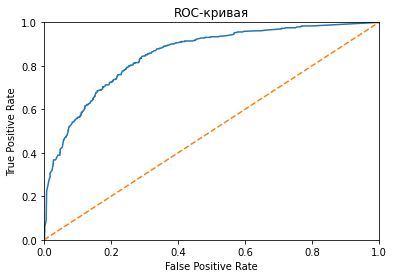

'Значение метрики AUC-ROC: 0.8511368247022377'

'Accuracy: 0.799890049477735'

'F1: 0.5825688073394495'

'Precision: 0.4980392156862745'

'Recall: 0.7016574585635359'

In [67]:
plot_roc(best_model_rfc, features_test, target_test)

## Вывод

Задача исследования - спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Проанализированы исторические данные о поведении клиентов и расторжении договоров с банком ('/datasets/Churn.csv'). 

В таблице содержатся следующие признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

Проведен анализ и подготовка данных к исследованию:
- В данных отсутствуют дубликаты строк. 
- Удалены строки с пропусками значений в столбце `Tenure`.
- Значения в столбцах `CreditScore`, `Age` и `Balance` имеют распределения, близкие к нормальному. При этом в `Balance` отдельно выделяется категория с нулевой суммой на счету.
- Среднее значение целевого признака - 0.2. То есть 20% клиентов покинули банк. Можно сделать вывод о дисбалансе классов.

- Для построения моделей не использовались идентификационные значения столбцов `RowNumber`, `CustomerId`, `Surname`.
- Произведно прямое кодирование признаков с удалением первого столбца.
- Произведена стандартизация.
- Данные разделены на обучающую, валидационную и тестовую выборки.

Для построения моделей использовался произвольный набор гиперпараметров. Целью являлось продемонстрировать их влияния на метрики и приблизиться к целевому значению F1.

- Построена модель логистической регрессии, на которой удалось получить значения F1-меры 0.299 без учета дисбаланса классов.
- Построена модель дерева решений, на которой удалось получить значения F1-меры 0.535 без учета дисбаланса классов.
- Построена модель случайного леса, на которой удалось получить значения F1-меры 0.485 без учета дисбаланса классов.
- Для полученных моделей построены графики ROC-curve и вычислены значения метрик AUC-ROC, Accuracy, Precision, Recall

Для борьбы с дисбалансом применены несколько методов. Для примера использовалась показавшая хороший результат без учета дисбаланса модель случайного леса.
- Применен метод upsampling. Значение F1-меры увеличилось до 0.6015.
- Применен метод downsampling. Значение F1-меры увеличилось до 0.6034.
- Применен метод автоматической балансировки классов. Значение F1-меры увеличилось до 0.611.

Проведено тестирование модели на тестовой выборке. Получено значение F1-меры 0.578

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*